In [1]:
userRDD = sc.textFile("ml-100k/u.user").map(lambda line: line.split("|"))
userRDD.first()

[u'1', u'24', u'M', u'technician', u'85711']

In [2]:
agesRDD = userRDD.map(lambda fields: int(fields[1]))
agesRDD.stats()

(count: 943, mean: 34.051961824, stdev: 12.1862731509, max: 73.0, min: 7.0)

Populating the interactive namespace from numpy and matplotlib


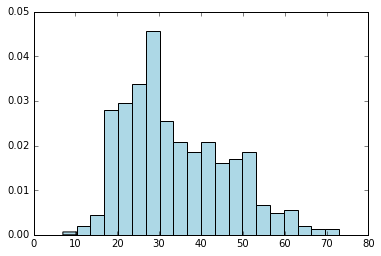

In [4]:
%pylab inline
ages = agesRDD.collect()
hist(ages, bins=20, color='lightblue', normed=True)
fig = matplotlib.pyplot.gcf()

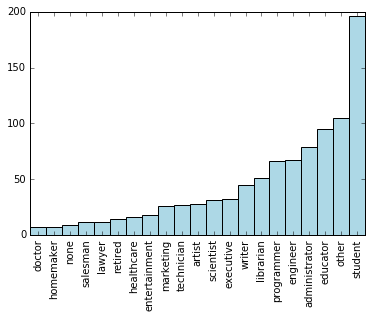

In [5]:
count_by_occupation = userRDD.map(lambda fields: (fields[3], 1)).reduceByKey(lambda x, y: x + y).collect()

x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])

x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

pos = np.arange(len(x_axis))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width/2))
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()

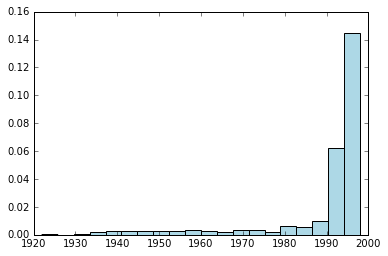

In [6]:
itemRDD = sc.textFile("ml-100k/u.item").map(lambda line: line.split("|"))
itemRDD.first()

def convert_year(x):
    try:
        return int(x[-4:])
    except:
        return 1900
    
years = itemRDD.map(lambda fields: convert_year(fields[2])).filter(lambda year: year != 1900).collect()

hist(years, bins=20, color='lightblue', normed=True)
fig = matplotlib.pyplot.gcf()

In [7]:
dataRDD = sc.textFile("ml-100k/u.data").map(lambda line: line.split("\t")[0:3])
dataRDD.first()

ratingsRDD = dataRDD.map(lambda fields: int(fields[2]))
ratingsRDD.stats()

(count: 100000, mean: 3.52986, stdev: 1.12566797076, max: 5.0, min: 1.0)

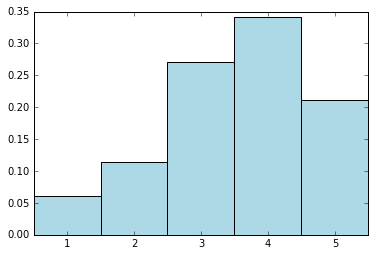

In [8]:
count_by_rating = ratingsRDD.countByValue()

x_axis = np.array(count_by_rating.keys())
y_axis = np.array([float(c) for c in count_by_rating.values()])

y_axis_normed = y_axis / y_axis.sum()
pos = np.arange(len(x_axis))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis_normed, width, color='lightblue')
#plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()